## Representing Qubit States

In [15]:
# Importing required packages
from qiskit import QuantumRegister, QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

# Specifying the quantum simulator for simulating the circuits
sim = Aer.get_backend('aer_simulator')

### Postulate 1

The state of a quantum system is described by a unit vector in hilbert space


$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\ket{q} = \frac{1}{\sqrt{2}}\ket{0} + \frac{i}{\sqrt{2}}\ket{1}$$

$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\ket{q} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1   \\ 0 \end{bmatrix} + \frac{i}{\sqrt{2}}\begin{bmatrix} 0   \\ 1 \end{bmatrix}$$

$$q =\begin{bmatrix} \frac{1}{\sqrt{2}}   \\ \frac{i}{\sqrt{2}} \end{bmatrix}$$

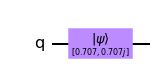

In [6]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)  

# Define initial_state as the one mentioned above
initial_state = [1/sqrt(2),1.j/sqrt(2)]     

# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state, 0) 

# Displaying the quantum circuit
qc.draw(output="mpl")

In [7]:
# Simulator saves the statevector
qc.save_statevector()   

# Run the simulation and return the result
result = sim.run(qc).result()

In [8]:
# Get the output state vector
output_state = result.get_statevector()

# Display the output state vector
print(output_state) 

[0.70710678+0.j         0.        +0.70710678j]


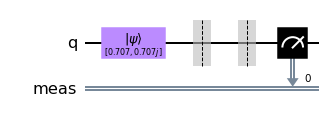

In [9]:
# Measure and display the quantum circuit 
qc.measure_all()
qc.draw(output="mpl")

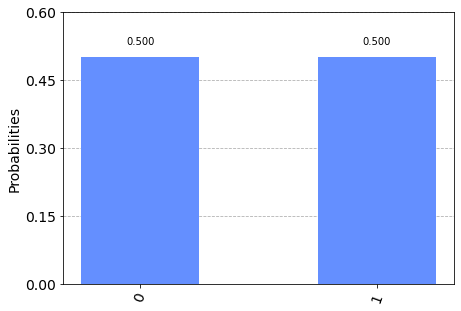

In [10]:
# Probability of the output state
counts = result.get_counts()
plot_histogram(counts)

/home/tapli/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


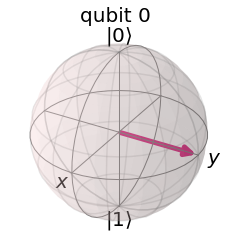

In [11]:
# Representing the qubit on a Bloch Sphere
plot_bloch_multivector(output_state)

### Postulate 2

For any observable, there is a corresponding operator in quantum mechanics

Classical observables are introduced into quantum mechanics
using operators. Specifically, every observable (measurable
property) of a physical system is described by an operator that acts
on state kets


### Postulate 3

The only possible outcomes of measuring an observable are the eigenvalues of its operator

The result of a measurement of an observable with an operator
  will only ever be an eigenvalue of  .

z gate example


In [44]:
sim = Aer.get_backend('statevector_simulator')

# Create a quantum circuit with one qubit
qc0 = QuantumCircuit(1)
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)

# # Define initial_state as the one mentioned above
# initial_state_0 = [1, 0] 
# initial_state_1 = [1/sqrt(2),1.j/sqrt(2)] 
# initial_state_2 = [1/sqrt(2),1/sqrt(2)] 

# # Apply initialisation operation to the 0th qubit
# qc0.initialize(initial_state_0, 0) 
# qc1.initialize(initial_state_1, 0) 
# qc2.initialize(initial_state_2, 0) 

# Displaying the quantum circuit
# qc.draw(output="mpl")

In [45]:
qc0.z(0)

qc1.h(0)
qc1.z(0)

qc2.h(0)
qc2.s(0)
qc2.z(0)

In [46]:
# Run the simulation and return the result
result0 = execute(qc0, sim).result()
result1 = execute(qc1, sim).result()
result2 = execute(qc2, sim).result()

# Get the output state vector
output_state_0 = result0.get_statevector()
output_state_1 = result1.get_statevector()
output_state_2 = result2.get_statevector()

/home/tapli/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


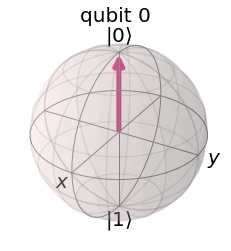

In [28]:
# Representing the qubit on a Bloch Sphere
plot_bloch_multivector(output_state_0)

In [ ]:
plot_bloch_multivector(output_state_1)

In [ ]:
plot_bloch_multivector(output_state_2)

In [43]:
qc1.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ Z ├
     └───┘└───┘

In [49]:
# from qiskit import visualization
# visualization.visualize_transition(qc1, saveas="z1_gate.gif", fpg=30)

<img src="//github.com/DSC/Kalman-and-Bayesian-Filters-in-Python/raw/ee586f5d84664383d079aa0bcb480fa78c8b0d2d//animations/05_dog_track.gif">

### Postulate 4

The probability of measuring an eigenvalue is the modulus squared of the inner product of its corresponding eigenvector with the initial state.




### Postulate 5

After measurement, the quantum state collapses to the eigenvector corresponding to the observed eigenvalue.




### Postulate 6

The time evolution of a quantum state can be modeled by a matrix. To obtain the state after the evolution, we multiply the matrix to the initial state.

Quantum states generally change (evolve) with time. This time
evolution preserves the normalization of the state. The time
evolution of the state of a quantum system is described by:
|ψ(t)〉=Û(t)|ψ(0)〉, for some unitary operator Û
